# Makeup Products Recommender System

## Goals

To build several recommender systems for current users and potential users with different approaches: 

__Demographic filtering:__ based purely on overall ratings of products  

__Collaborative filtering:__ based on user-item interaction history

__Content based filtering:__ based on product features and user features -- in progress

__Hybrid model:__ based on user feature, item feature, and interaction, potentially recommending products to new users according to user input -- in progress

## Dataset overview

This system used a private dataset scrapped from https://www.sephora.com containing product details and user reviews history, including 13K products, 210K users, 325K reviews. I've put them into 2 csv files:

> __'all_primary_products.csv':__

__product_id:__       product identifier<br>
__sku_id:__           identifier for different colors within one product<br>
__category:__         category this product belongs to, i.e. eye, face, lip...<br>
__name:__ prodcut name<br>
__brand:__ product brand<br>
__price:__ product price at the time of webcrawling<br>
__product_url:__ product url<br>
__image_url:__ url of the main product image<br>
__rating:__ overall average rating<br>
__reviews_count:__ number of reviews on this product<br>
__loves_count:__ number of 'love' clicked on this product<br>
__color_count:__ color counts of the product, if any. e.g. accessories normally have 0 colors, but foundations could have several different	colours<br>
__details:__ detailed product discription<br>
__sku_group:__ different colors within one product<br>
__similar_products:__ similar products defined by merchant<br>
__bought_together:__ products that usually bought together<br>
__is_listed:__ whether the product is available at the time of webcrawling


> __'all_users_reviews.csv':__

__product_id:__       product identifier<br>
__product_name:__ prodcut name<br>	product_url: product url<br>
__user_nickname:__ 	user nickname<br>
__author_id:__ user identifier	<br>
__location:__ user location<br>
__eye_color:__ user eye color on file	<br>
__hair_color:__ user hair color on file<br>
__skin_tone:__ user skin tone on file<br>
__skin_type:__ user skin type on file<br>
__age_range:__ user age range on file<br>
__rating:__ rating this user gave to this product, on scale 1-5<br>
__review_title:__ title of user review<br>
__review_text:__ text of this review<br>
__is_recommended:__ whether this user recommend this product, '1' recommend, '0' not recommend<br>
__submission_time:__ time of the review submission<br>
__helpful_count:__ number of people who think this review is helpful<br>
__not_helpful_count:__ number of people who think this review is not helpful<br>
__helpfulness:__ helpful_count/(helpful_count+not_helpful_count)<br>

## Data preparation

Import all libs we need

In [1]:
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = [13, 8]

First we have a look at the overall ratings of products

In [2]:
prod=pd.read_csv('all_primary_products.csv')
prod.head(10)

,product_id,sku_id,category,name,brand,price,product_url,image_url,rating,reviews_count,loves_count,color_count,details,sku_group,similar_products,bought_together,is_listed
0,P432235,2058733.0,eye,Superhero Liner,IT Cosmetics,32.0,https://www.sephora.com/product/superhero-line...,https://www.sephora.com/productimages/sku/s205...,4.2308,0,0,0,NaN,[],[],[],no
1,P411833,1875038.0,eye,Blackest Black Eyeshadow Gold Rush,Natasha Denona,37.0,https://www.sephora.com/product/blackest-black...,https://www.sephora.com/productimages/sku/s187...,3.9000,10,2319,1,"What it is:\n A full-coverage, highly pigmente...",['1875038'],"['P404832', 'P63087293', 'P424001', 'P309813',...","['P437713', 'P384060', 'P313025', 'P421738', '...",yes
2,P411302,1865245.0,eye,Precision Felt Eyeliner,Guerlain,49.0,https://www.sephora.com/product/precision-felt...,https://www.sephora.com/productimages/sku/s186...,3.7500,8,795,1,What it is:\nAn eyeliner with a long felt tip ...,['1865245'],"['P403324', 'P230234', 'P253818', 'P245205', '...","['P17876556', 'P429720', 'P313034', 'P416204',...",yes
3,P406816,1811918.0,eye,X-Rated Mascara,Smashbox,28.0,https://www.sephora.com/product/x-rated-mascar...,https://www.sephora.com/productimages/sku/s181...,3.5732,0,0,0,NaN,[],[],[],no
4,P433486,2089423.0,eye,MASCARA VOLUME EFFET FAUX CILS Flash Primer,Yves Saint Laurent,41.0,https://www.sephora.com/product/mascara-volume...,https://www.sephora.com/productimages/sku/s208...,5.0000,0,0,0,NaN,[],[],[],no
5,P427709,2041796.0,eye,Sunset Strip,NUDESTIX,65.0,https://www.sephora.com/product/sunset-strip-P...,https://www.sephora.com/productimages/sku/s204...,4.6000,0,0,0,NaN,[],[],[],no
6,P435745,2134013.0,eye,Simply Nudes 12-Colour Eyeshadow Palette,Lise Watier,65.0,https://www.sephora.com/product/simply-nudes-1...,https://www.sephora.com/productimages/sku/s213...,4.0000,0,0,0,NaN,[],[],[],no
7,P435752,2133999.0,eye,V Element Volcanic Minerals Mascara,Lise Watier,27.0,https://www.sephora.com/product/v-element-volc...,https://www.sephora.com/productimages/sku/s213...,3.8182,0,0,0,NaN,[],[],[],no
8,P426215,1993682.0,eye,Spike Lash Mascara,TOM FORD,54.0,https://www.sephora.com/product/spike-lash-mas...,https://www.sephora.com/productimages/sku/s199...,3.6000,0,0,0,NaN,[],[],[],no
9,P437739,2112696.0,eye,Mixing Balm,MAKE UP FOR EVER,33.0,https://www.sephora.com/product/mixing-balm-P4...,https://www.sephora.com/productimages/sku/s211...,0.0000,0,831,0,"What it is: A rich, nourishing balm to mix wit...",[],"['P169812', 'P277300', 'P427522', 'P261211', '...","['P437365', 'P437364', 'P404229', 'P419631', '...",yes


In [3]:
prod.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
product_id,3925,3387,P427344,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sku_id,3924,NaN,NaN,NaN,1.87534e+06,307214,48041,1.75423e+06,1.95008e+06,2.0938e+06,2.22557e+06
category,3925,7,eye,1083,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,3925,3341,Lipstick,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,3925,144,SEPHORA COLLECTION,330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,3925,NaN,NaN,NaN,41.0424,28.6192,2,26,35,49,526
product_url,3925,3387,https://www.sephora.com/product/prismatic-mult...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
image_url,3925,3377,https://www.sephora.com/productimages/sku/s202...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,3925,NaN,NaN,NaN,4.04721,0.83468,0,3.8776,4.2289,4.5,5
reviews_count,3925,NaN,NaN,NaN,370.905,1098.22,0,1,42,275,17000


Sereval observations on the raw data:

1, sku_id indicates different colors within the same product. But since all the ratings/reviews/loves are based on products, this additional infomation will be discarded. 

2, is_listed=no means the product is discontinued right now, thus should not appear in our recommendation system.

3, The product details are useful for a content based filtering system, but are currently beyond the scope. The same applies to sku_group, similar_products and bought_together.


In [4]:
prod=prod[prod['is_listed']=='yes']
prod=prod[prod['rating']!=0]
columns_to_drop=['sku_group','similar_products','bought_together','details','sku_id','color_count','is_listed']
prod=prod.drop(columns_to_drop, axis=1)
prod.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
product_id,2962,2539,P427344,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,2962,7,eye,816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,2962,2515,Prismatic Pearl Multistick,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,2962,124,SEPHORA COLLECTION,302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,2962,NaN,NaN,NaN,40.1456,28.3333,2,25,35,48,526
product_url,2962,2539,https://www.sephora.com/product/prismatic-mult...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
image_url,2962,2532,https://www.sephora.com/productimages/sku/s202...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,2962,NaN,NaN,NaN,4.17017,0.47743,1,3.93843,4.25,4.5,5
reviews_count,2962,NaN,NaN,NaN,491.484,1240.58,0,25,107,450.25,17000
loves_count,2962,NaN,NaN,NaN,31328.4,63525.8,0,4356,11448,30574,1.17586e+06


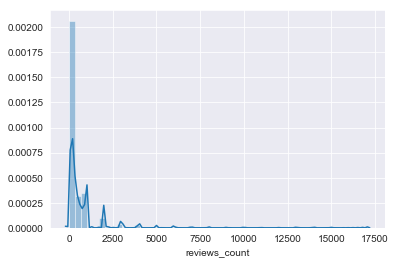

In [5]:
rc=sns.distplot(prod['reviews_count']);

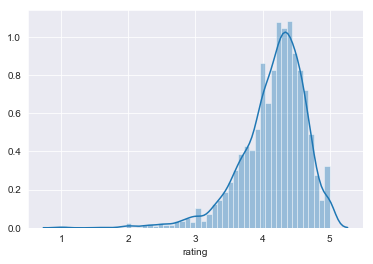

In [6]:
plt.figure()
scoreplot=sns.distplot(prod['rating']);

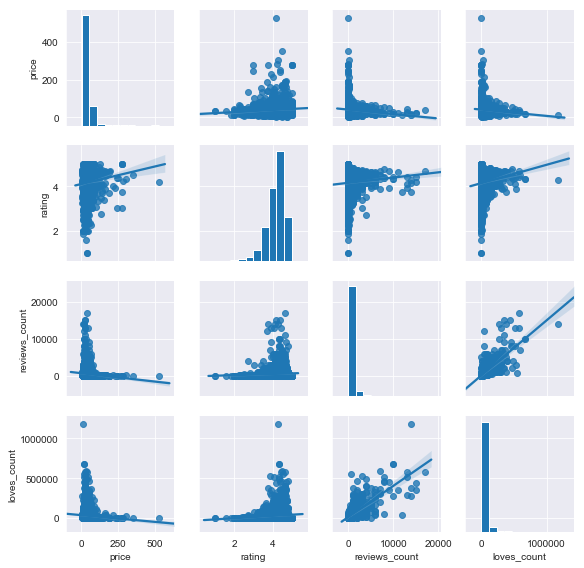

In [7]:
sns.pairplot(prod,height=2,kind='reg');

## Demographic Filtering - based purely on overall ratings

We want to first build a simple recommender purely based on ratings, without product-user interaction. 

We see from abover figures that the numbers of reviews given to products vary greatly. Reviews_count and loves_count highly corelate with each other thus can not be used as independent features. And the rating is only meaningful when the number of users giving rating/review is higher than a certain cutoff. 


Here I'm using a modified 'weighted rating' by IMDB: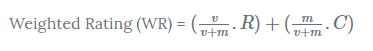

__v__ is the number of votes for the movie, here I use review_counts which reflects more serious ratings than rate_counts;

__m__ is the minimum votes required to be listed in the chart, here I use the 10 percentile of review_counts, meaning one product have to gain more votes than at least 10% of all products;

__R__ is the average rating of the movie, here it's just rating;

__C__ is the mean vote across the whole report, here is the average of ratings.

In [8]:
C=prod['rating'].mean()
m=prod['reviews_count'].quantile(0.1)
C,m

(4.170169108710331, 9.0)

Here we created a sub dataset that only contains the products with more reviews than m

In [9]:
q_prod = prod.copy().loc[prod['reviews_count'] >= m]
q_prod.shape

(2673, 10)

Here we define a function to get weighted rating for each product

In [10]:
def weighted_rating(x, m=m, C=C):
    R=x['rating']
    v=x['reviews_count']
    return (v/(v+m) * R) + (m/(m+v) * C)


In [11]:
q_prod['score'] = q_prod.apply(weighted_rating, axis=1)
q_prod.shape

(2673, 11)

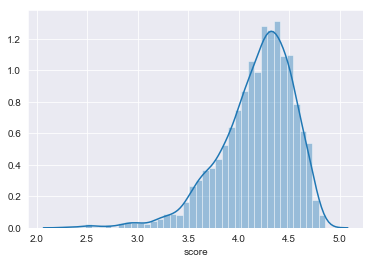

In [12]:
plt.figure()
scoreplot=sns.distplot(q_prod['score']);

This distribution looks much more reasonable than the original rating.

Now if I want to make a recommendation list purely based on the score, not personal at all, I'm done already. Here is a list of top 5 products in each category based purely on weighted rating:

In [13]:
q_prod.groupby('category').apply(pd.DataFrame.nlargest, n=5, columns='score').drop(columns=['category','image_url','rating','reviews_count','loves_count'])

product_id                                               name  \
category                                                                        
accessory  789     P428809                              Pack It All Organizer   
           890     P394560                             Breakups To Makeup Bag   
           787     P384059                                          Brush #12   
           804     P414661                                Prep-N-Glow™ Cloths   
           802     P382357             Aburatorigami Japanese Blotting Papers   
applicator 2067    P430239                                 Veil™ Powder Brush   
           2062    P405525                 PRO Featherweight Powder Brush #91   
           2073    P384066                                       Kabuki Brush   
           2087    P313020                      PRO Airbrush Detail Brush #57   
           2064    P389120                   Solid Clean: Solid Brush Cleaner   
cheek      502     P427643                    Bomb Baby Mini Lip and Face Set   
           734     P419627                                           Duo Glow   
           3768    P420728  Dual Finish Multi-tasking Illuminating Highlig...   
           528     P434021                   Blush Bouquet Dual Blush Palette   
           543     P440021                    Wanderlust Primer-Infused Blush   
eye        2581    P409118              Modern Renaissance Eye Shadow Palette   
           1417    P426848                   Chocolate Gold Eyeshadow Palette   
           1467    P277300  Shadow Insurance Glitter Glue Glitter Bonding ...   
           2509  P58930227                        Soft Glam Eyeshadow Palette   
           2720    P413457                  Shade + Light Eye Contour Palette   
face       991     P427643                    Bomb Baby Mini Lip and Face Set   
           3130    P419627                                           Duo Glow   
           3281    P420728  Dual Finish Multi-tasking Illuminating Highlig...   
           3332    P409989                       Lock-It Setting Powder Brush   
           2868  P37544587                          Fairy Bomb Shimmer Powder   
lip        225     P427643                    Bomb Baby Mini Lip and Face Set   
           438   P43578337  Summer Daze & Summer Nights Iridescent Lip Lum...   
           217     P442530                        Orgasm Oil-Infused Lip Tint   
           288     P440022                      Wanderlust Plumping Lip Cream   
           236     P441883                      Weightless Lip Color Lipstick   
nail       1230    P387853                    Cut to the Point Cuticle Nipper   
           1222    P265501                            Diamond Foot Buffer #11   
           1239    P388682                             NAILKALE - Illuminator   
           1235    P406743                          Overnight Detox Nail Mask   
           1225    P408299              Superfood Nail and Cuticle Repair Oil   

                                   brand  price  \
category                                          
accessory  789        SEPHORA COLLECTION   56.0   
           890        SEPHORA COLLECTION   30.0   
           787   Anastasia Beverly Hills   23.0   
           804                    NuFACE   12.0   
           802                    Tatcha   15.0   
applicator 2067                Hourglass   78.0   
           2062       SEPHORA COLLECTION   50.0   
           2073                Too Faced   40.0   
           2087       SEPHORA COLLECTION   30.0   
           2064       SEPHORA COLLECTION   10.0   
cheek      502   FENTY BEAUTY by Rihanna   28.0   
           734            Natasha Denona   49.0   
           3768                  Lancôme   53.0   
           528           Jouer Cosmetics   38.0   
           543                     Buxom   27.0   
eye        2581  Anastasia Beverly Hills   55.0   
           1417                Too Faced   59.0   
           1467                Too Faced   24.0  

## Collaborative filtering

Let's take a look at next data file, with product-user interaction.

In [14]:
ratings=pd.read_csv('all_users_reviews.csv')

In [15]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324111 entries, 0 to 324110
Data columns (total 19 columns):
product_id           324111 non-null object
product_name         324111 non-null object
product_url          324048 non-null object
user_nickname        322138 non-null object
author_id            324111 non-null object
location             48530 non-null object
eye_color            263123 non-null object
hair_color           223416 non-null object
skin_tone            239595 non-null object
skin_type            239595 non-null object
age_range            78763 non-null object
rating               324111 non-null int64
review_title         236257 non-null object
review_text          324111 non-null object
is_recommended       324111 non-null int64
submission_time      324111 non-null object
helpful_count        324111 non-null int64
not_helpful_count    324111 non-null int64
helpfulness          151781 non-null float64
dtypes: float64(1), int64(4), object(14)
memory usage: 47.

In [16]:
n_users=len(ratings['author_id'].unique())
n_items=len(ratings['product_id'].unique())
n_users, n_items

(210000, 2424)

### Matrix factorization with Singular Value decomposition provided by surprise library.

In [17]:
from surprise import Reader, Dataset, SVD, evaluate

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[[ 'author_id','product_id', 'rating']],reader)
data.split(n_folds=5)

In [18]:
svd = SVD()
evaluate(svd, data, measures=['RMSE', 'MAE'])

/Users/Fall/anaconda3/envs/tf/lib/python3.6/site-packages/surprise/evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
/Users/Fall/anaconda3/envs/tf/lib/python3.6/site-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 1.1606
MAE:  0.8996
------------
Fold 2
RMSE: 1.1617
MAE:  0.8987
------------
Fold 3
RMSE: 1.1631
MAE:  0.9017
------------
Fold 4
RMSE: 1.1677
MAE:  0.9020
------------
Fold 5
RMSE: 1.1622
MAE:  0.9000
------------
------------
Mean RMSE: 1.1630
Mean MAE : 0.9004
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'rmse': [1.1605636976350746,
                             1.161738677028521,
                             1.1630510489053199,
                             1.1676601102030764,
                             1.1621545188986724],
                            'mae': [0.8995776771927169,
                             0.8986652419910496,
                             0.9017372587796575,
                             0.9020430596823037,
                             0.8999534350584097]})

These scores look OK to me. Now let's fit our real model with the whole dataset.

In [19]:
trainset = data.build_full_trainset()
svd.fit(trainset)

Randomly pick one user-product combination to see how the prediction model works.

In [20]:
sampler=ratings.sample(n=1)
pid=sampler.iloc[0]['product_id']
uid=sampler.iloc[0]['author_id']
r_pu=sampler.iloc[0]['rating']

In [21]:
rating_pred=svd.predict(uid,pid,r_pu)

In [22]:
rating_pred

Prediction(uid='2036753850', iid='P307909', r_ui=5, est=4.588296139614033, details={'was_impossible': False})

Seems it works! Yeah!

### Matrix factorization using TensorRec

Now let's try another Matrix factorization method: TensorRec.

TensorRec is a Python package for building recommender systems. A TensorRec recommender system consumes three pieces of input data: user features, item features, and interactions. Based on the user/item features, the system will predict which items to recommend. The interactions are used when fitting the model: predictions are compared to the interactions and a loss/penalty is calculated, which the system learns to decrease.

In [23]:
import tensorrec

In [24]:
#Create internal index in order to create sparse matrices
user_id_internal=range(n_users)
prod_id_internal=range(n_items)
user_id_dict=dict(zip(ratings['author_id'].unique().tolist(),user_id_internal))
prod_id_dict=dict(zip(ratings['product_id'].unique().tolist(),prod_id_internal))

In [25]:
ratings['user_id']=ratings['author_id'].map(user_id_dict)

In [26]:
ratings['item_id']=ratings['product_id'].map(prod_id_dict)

In [40]:
ratings.sample(frac=1).reset_index(drop=True)  # Shuffles the rows in-place
cutoff = int(0.8 * len(ratings))
train_ratings = ratings[:cutoff]
test_ratings = ratings[cutoff:]

In [41]:
from scipy import sparse
def interactions_to_sparse_matrix(interactions):
    
    return sparse.coo_matrix((interactions['rating'].values, (interactions['user_id'].values, interactions['item_id'].values)),
                             shape=(n_users, n_items))


# Create sparse matrices of interaction data
sparse_train_ratings = interactions_to_sparse_matrix(train_ratings)
sparse_test_ratings = interactions_to_sparse_matrix(test_ratings)


In [42]:
# Create sets of train/test interactions that are only ratings 4 or 5

sparse_train_ratings_4plus = sparse_train_ratings.multiply(sparse_train_ratings >= 4.0)
sparse_test_ratings_4plus = sparse_test_ratings.multiply(sparse_test_ratings >= 4.0)

Fit the model with a loss function: WMRB 

In [43]:
print("Training collaborative filter with WMRB loss")
user_indicator_features = sparse.identity(n_users)
item_indicator_features = sparse.identity(n_items)

ranking_cf_model = tensorrec.TensorRec(n_components=5,
                                       loss_graph=tensorrec.loss_graphs.WMRBLossGraph())
ranking_cf_model.fit(interactions=sparse_train_ratings_4plus,
                     user_features=user_indicator_features,
                     item_features=item_indicator_features,
                     n_sampled_items=int(n_items * .01))


Training collaborative filter with WMRB loss


/Users/Fall/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/Fall/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/Fall/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/Fall/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:11

Let's check the result using a metric called “recall at K.” Recall@K says, for the average user, what percentage of their test items made it in to the top K in the predicted rankings. In other words, if we get a recall@10 value of .06, then there is a 6% chance that a particular product I should like will make it in to my top 10 recommendations.

In [44]:
# This method consumes item ranks for each user and prints out recall@10 train/test metrics
def check_results(ranks):
    train_recall_at_10 = tensorrec.eval.recall_at_k(
        test_interactions=sparse_train_ratings_4plus,
        predicted_ranks=ranks,
        k=10
    ).mean()
    test_recall_at_10 = tensorrec.eval.recall_at_k(
        test_interactions=sparse_test_ratings_4plus,
        predicted_ranks=ranks,
        k=10
    ).mean()
    print("Recall at 10: Train: {:.4f} Test: {:.4f}".format(train_recall_at_10,
                                                            test_recall_at_10))


In [45]:
predicted_ranks = ranking_cf_model.predict_rank(user_features=user_indicator_features,
                                        item_features=item_indicator_features)
check_results(predicted_ranks)

Recall at 10: Train: 0.5020 Test: 0.0723


Looks pretty good! This means given any product that I would like, there's a 10% chance it will show up on my screen if the website suggests 10 products. Given the total number of products, I think this is not bad.

## Content based filtering

One difference between the nature of a makeup product recommender on a shopping website and a movie recommender is that a lot of users only bought/rated a very small number of products, so the interaction history may not be very useful for generalization. Additionally, movie websites face frequent users, while a shopping website for makeup products could have a lot of new users as potential customers. To attract these users by providing matching recommendations based on minimal user input is key for business. 

Thus I will now try to make a new model intergrating detailed product features and user features, then build a final hybrid model combining collaborative and content based approaches.